In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customer/Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('/kaggle/input/mall-customer/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = df[['Age', 'Annual_Income_(k$)', 'Spending_Score']]
X_scaled = StandardScaler().fit_transform(X)

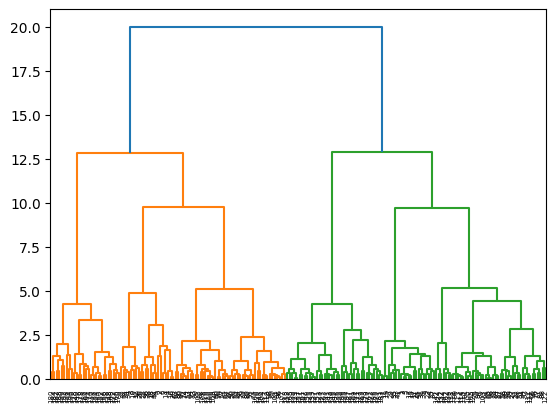

In [5]:
dendrogram = dendrogram(linkage(X_scaled, method = 'ward'))

In [6]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(
    n_clusters=6,
    linkage='ward'
)

labels = agg.fit_predict(X_scaled)
df['Cluster'] = labels


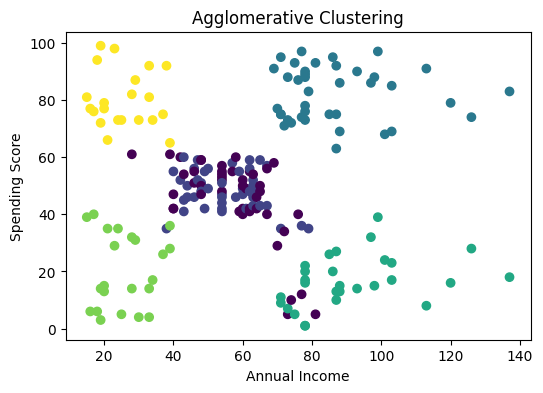

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(
    df['Annual_Income_(k$)'],
    df['Spending_Score'],
    c=labels
)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Agglomerative Clustering")
plt.show()
